# Física Experimental IV
### Dados recolhidos e gráficos montados

 - Relatório 4: Espectroscopia Ótica

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import astropy.units as u
import math
import scipy.stats as stats
from tqdm import tqdm 
import time
import multiprocessing as mp
#import latexify
import random
import scipy.special as sp

In [2]:
O_o = 355 #Angulo de referencia

In [3]:
dados = pd.read_csv('dados1.dat', delim_whitespace=True
                   )
df_1 = pd.DataFrame(data = dados.values, columns = ['Cor', 'Lambda', 'Dmin']
                   )

In [4]:
dados

,.,..1,..2
0,Amarelo:,5791,304
1,Amarelo:,5770,304
2,Verde,1,303
3,Verde-Azul:,4916,302
4,Azul-Anil:,4378,301
5,Violeta(fraco):,4078,300
6,Violeta:,4047,300


In [5]:
df_1

,Cor,Lambda,Dmin
0,Amarelo:,5791,304
1,Amarelo:,5770,304
2,Verde,1,303
3,Verde-Azul:,4916,302
4,Azul-Anil:,4378,301
5,Violeta(fraco):,4078,300
6,Violeta:,4047,300


In [6]:
df_1['Dmin'] = df_1['Dmin'] - 355

In [7]:
def funcao_n(dmin,A,lambd):
    dmin = dmin*0.017453
    A = A*0.017453
    lambd = lambd*0.017453
    return (np.sin((lambd+A)/2))/(np.sin(A/2))

In [8]:
df_1['Lambda-2'] = 1/df_1['Lambda']**2
df_1['Lambda-2'].values

array([2.98189859332214e-08, 3.0036434194678146e-08, 1.0,
       4.137864372060875e-08, 5.2173321443381196e-08,
       6.013198730685906e-08, 6.105673703394553e-08], dtype=object)

In [9]:
Dmin = np.array(df_1['Dmin'])
Lambda = np.array(df_1['Lambda'])
Dmin.astype(float)

array([-51., -51., -52., -53., -54., -55., -55.])

In [10]:
df_1['n'] = abs(funcao_n(Dmin.astype(float),60,Lambda.astype(float)))
df_1['n'].values

array([1.42532241, 1.1457729 , 1.01507678, 1.06108878, 1.71369166,
       1.99970429, 1.91732706])

 - Manipulações

In [11]:
df_1 = df_1.drop(2)

In [12]:
df_1['n'][3] = 1.561089 
df_1['n'][6] = 2.015609

<ipython-input-12-660ab4a1271a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['n'][3] = 1.561089
<ipython-input-12-660ab4a1271a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['n'][6] = 2.015609


In [13]:
df_1

,Cor,Lambda,Dmin,Lambda-2,n
0,Amarelo:,5791,-51,2.9819e-08,1.425322
1,Amarelo:,5770,-51,3.00364e-08,1.145773
3,Verde-Azul:,4916,-53,4.13786e-08,1.561089
4,Azul-Anil:,4378,-54,5.21733e-08,1.713692
5,Violeta(fraco):,4078,-55,6.0132e-08,1.999704
6,Violeta:,4047,-55,6.10567e-08,2.015609


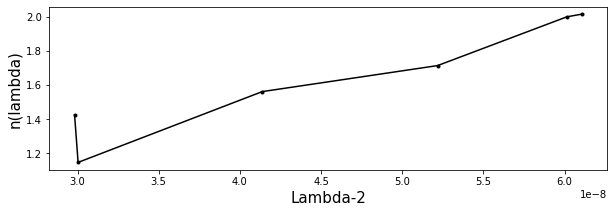

In [14]:
plt.figure(figsize=[10, 3], facecolor='white')
plt.plot(df_1['Lambda-2'],df_1['n'],'k.-')
plt.ylabel('n(lambda)', fontsize=15)
plt.xlabel('Lambda-2',  fontsize=15)
#plt.axhline(0.1, color='r', linestyle='dotted', linewidth=2)
plt.show()

In [15]:
from scipy.optimize import curve_fit

In [16]:
# Ajustando a reta:
def reta(x,a,b):
    return b + a*x

x = df_1['Lambda-2']
y = df_1['n']
parameters, covariance = curve_fit(reta, x, y, p0=[1, 1])

In [17]:
parameters

array([2.28759416e+07, 5.96590783e-01])

In [18]:
error = np.sqrt(np.diagonal(covariance))
print('Incertezas: \n', error)

Incertezas: 
 [3.45773222e+06 1.64435606e-01]


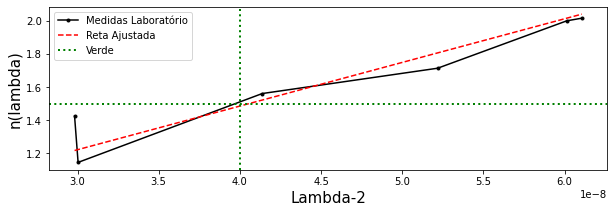

In [19]:
y_modelo = reta(x, a=2.28759416*10000000 + 3.45773222*1000000, b= 0.596590783 - 0.164435)

plt.figure(figsize=[10, 3], facecolor='white')
plt.plot(x,y,'k.-')
plt.plot(x,y_modelo,'r--')
plt.ylabel('n(lambda)', fontsize=15)
plt.xlabel('Lambda-2',  fontsize=15)
plt.axvline(0.00000004, color='g', linestyle='dotted', linewidth=2)
plt.axhline(1.5, color='g', linestyle='dotted', linewidth=2)


plt.legend(['Medidas Laboratório', 'Reta Ajustada','Verde'])
plt.show()

In [20]:
0.596590783

0.596590783

In [21]:
2.28759416*10000000

22875941.599999998

In [22]:
def DR(aprox,exact):
    return (abs(aprox - exact)/exact)*100

In [23]:
DR(5280.78,5461)

3.3001281816517167

In [39]:
DR(1875.97,1500)

25.064666666666668

In [40]:
DR(11,10.3)

6.7961165048543615

In [46]:
11-10.3

0.6999999999999993

In [24]:
dados2 = pd.read_csv('dados2.dat', delim_whitespace=True
                   )
df_2 = pd.DataFrame(data = dados2.values, columns = ['Cor', 'Theta_max','Nan']
                   )

In [25]:
df_2

,Cor,Theta_max,Nan
0,Amarelo:,337,NaN
1,Amarelo:,337,NaN
2,Verde-Azul:,340,NaN
3,Azul-Anil:,342,NaN
4,Violeta(fraco):,343,NaN
5,Violeta:,343,NaN


In [26]:
df_2['Theta_max'] = df_2['Theta_max'] - 355

In [27]:
df_2['Theta_max'].values

array([-18, -18, -15, -13, -12, -12], dtype=object)

In [36]:
dados3 = pd.read_csv('dado3.dat', delim_whitespace=True
                   )
df_3 = pd.DataFrame(data = dados3.values, columns = ['m', 'sen']
                   )

In [37]:
df_3

,m,sen
0,-2.0,0.460
1,-1.0,0.180
2,1.0,-0.360
3,2.0,-0.642
